# Football Database 
Football and Betting Statistics of the European Top5 Leagues

**D2TEC – Tecnologias de Big Data**<br />
Especialização em Ciência de Dados - IFSP Campinas

Alunos
- Daniel Vargas Shimamoto
- Diego Machado de Assis

# 0. Informações Gerais

## 0.1. Conhecendo  o dataset

Este conjunto de dados contém dados relacionados ao futebol contendo as cinco principais ligas da Europa entre os anos de 2014-2020. Os dados estão dividos em 7 tabelas e foram coletados das fontes https://understat.com/ e https://www.football-data.co.uk/

Fonte: https://www.kaggle.com/technika148/football-database 

## 0.2. Tabelas:

**Players**
 * PlayerID (Int64): Id dos jogadores (PK)
 * Player Name (Object): Nome dos Jogadores

**Teams**
 * teamID (int64): Id dos Times (PK)
 * name (object): Nome dos times

**Leagues** 
 * leagueID (int64): Id das Ligas (PK)
 * name (object): Nome das ligas
 * understatNotation (object): Nome da liga (em notação understat)

**teamstats**
 * gameID (int64): Id do jogo (PK,FK)
 * teamID (int64): Id dos Times (PK, FK)
 * season (int64): Temporada
 * date (object): Data
 * location (object): Jogo dentro ou fora 
 * goals (int64): Gols
 * XGoals (float64): Expectativa de gols
 * shots (int64): Chutes
 * shotsOnTarget (int64): Chutes no gol
 * deep (int64): Passes realizados a uma distância estimada de 20 jardas do gol (exceto cruzamento)
 * ppda (float64): Passes permitidos por ação defensiva no meio-campo adversário
 * fouls (int64): Faltas
 * corners (int64): Escanteios
 * yellowCard (int64): Cartões amarelos
 * redCards (int64): Cartões vermelhos
 * results (object): Resultado
  
**shots**
 * gameID (int64): Id do jogo (PK,FK)
 * shooterID (int64): Id dos jogadores que chutou(PK, FK)
 * assisterID (float64): Id dos jogadores que deu assistência (PK, FK)
 * minute (int64): minuto
 * situation (object): Situação de jogo
 * lastAction (object): Ultima ação antes de chutar
 * shotType (object): Tipo de chute
 * shotResult (object): Resultado do Chute
 * xGoal (float64): Expectativa de Gol
 * positionX (float64): Posição onde o chute foi feito (lado longo do campo)
 * positionY (float64): Posição onde o chute foi feito (lado curto do campo)

**appearences**
 * gameID (int64): Id do jogo (PK,FK)
 * playerID (int64): Id do Jogador (PK,FK)
 * goals (int64): Gols
 * ownGoals (int64): Gols contras
 * shots (int64): Chutes
 * xGoals (float64): Gols esperados
 * xGoalsChain (float64): Gols esperados de cada posse em que o jogador esteve envolvido
 * xGoalsBuildup (float64): XGoalsChain sem passes chaves e chutes
 * assists (int64): Assistências
 * keyPasses (int64): Passes chaves
 * xAssists (float64): Assistencias esperadas
 * position (object): Possição (
 * positionOrder (int64): Posição (Númerica)
 * yellowCard (int64): Cartões amarelos
 * redCards (int64): Cartões vermelhos
 * time (int64): Time
 * substituteIn (int64): Jogador que entrou
 * substituteOut (int64): Jogador que saiu
 * leagueID (int64): Id das Ligas (PK, FK)
 

**games**
 * leagueID (int64): Id das Ligas (PK, FK)
 * season (int64): Temporada
 * date (object): Data
 * homeTeamID (int64): Id do time mandante(PK, FK)
 * awayTeamID (int64): Id do time visitante (PK, FK)
 * homeGoals (int64): Gols marcados pelo time mandante
 * awayGoals (int64): Gols marcados pelo time visitante
 * homeProbability (float64): Probabilidade estimada de vitória do time mandante
 * drawProbability (float64): Probabilidade estimada de empate
 * awayProbability (float64): Probabilidade estimada de vitória do time visitante
 * homeGoalsHalfTime (int64): Gols marcados pelo time mandante até o intervalo
 * awayGoalsHalfTime (int64): Gols marcados pelo time visitante até o intervalo
 * B365H (float64): 
 * B365D (float64): 
 * B365A (float64): 
 * BWH (float64): 
 * BWD (float64): 
 * BWA (float64): 
 * IWH (float64): 
 * IWD (float64): 
 * IWA (float64): 
 * PSH (float64): 
 * PSD (float64): 
 * PSA (float64): 
 * WHH (float64): 
 * WHD (float64): 
 * WHA (float64): 
 * VCH (float64): 
 * VCD (float64): 
 * VCA (float64): 
 * PSCH (float64): 
 * PSCD (float64): 
 * PSCA (float64): 


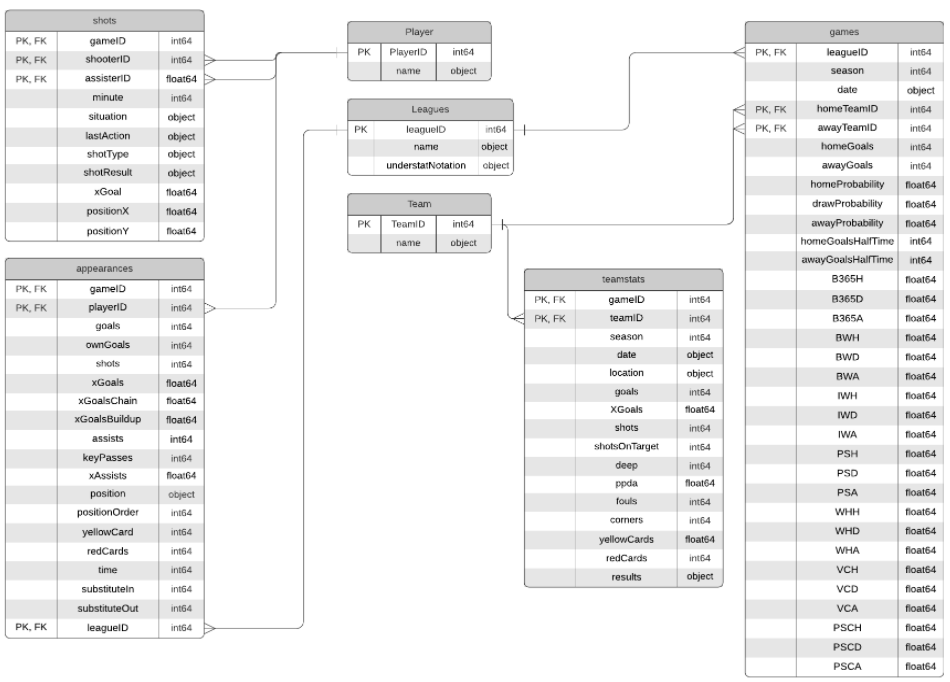

In [1]:
from IPython.display import Image
Image('Diagrama ER.png')

In [2]:
import sqlite3
import pandas as pd
conn = sqlite3.connect('FootballDb.db')

# Perguntas

## 1) Qual o time com percentual de vitórias?

## 2) Qual time que tinha maior probabilidade de vitórias nos jogos

## 3) Qual jogador fez mais gols?

## 4) Qual jogador fez mais assistencias?

## 5) Qual posição do campo mais sai gols?

## 6) Times que jogam como mandante vencem mais?

## 7) Times com jogadores expulsos perdem mais?

## 8) As expectativas de gols acertam?

## 9) Como é a distribuição dos times entre as ligas?

## 1) Qual o time com percentual de vitórias?

In [3]:
question_1 = pd.read_sql('''
SELECT
    name as Team,
    sum(vitorias) as Wins,
    count(vitorias) as Games,
    100 * cast(sum(vitorias) as float)/cast(count(vitorias) as float) as Win_rate
FROM(
    SELECT 
    CASE 
        WHEN result = 'W' THEN 1 
            ELSE 0 
        END AS vitorias,
    name
    FROM teamstats
    LEFT JOIN teams ON teamstats.teamID = teams.teamID
    )
GROUP BY name
ORDER BY Win_rate DESC
''', con=conn)
question_1.head(5)

,Team,Wins,Games,Win_rate
0,Bayern Munich,179,238,75.210084
1,Paris Saint Germain,187,255,73.333333
2,Juventus,191,266,71.804511
3,Barcelona,190,266,71.428571
4,Manchester City,183,266,68.796992


## 2) Quais são os confrontos que o time visitante tem a maior probabilidade estimada média de ganhar?

In [4]:
question_2 = pd.read_sql('''
SELECT 
    A.name as homeTeam,
    teams.name as awayTeam,
    avg(homeProbability) avg_homeProbability,
    avg(drawProbability) avg_drawProbability,
    avg(awayProbability) avg_awayProbability
FROM
    (
    SELECT
        name,
        awayTeamID,
        homeProbability,
        drawProbability,
        awayProbability
    FROM
        games
    LEFT JOIN teams ON games.homeTeamID = teams.teamID
    ) A
LEFT JOIN teams ON A.awayTeamID = teams.teamID
GROUP BY
    A.name,
    teams.name
ORDER BY
    avg_awayProbability DESC
''', con=conn)
question_2.head()

,homeTeam,awayTeam,avg_homeProbability,avg_drawProbability,avg_awayProbability
0,Cordoba,Barcelona,0.0002,0.00120,0.99860
1,Lecce,Atalanta,0.0005,0.00170,0.99780
2,Spezia,Inter,0.0004,0.02240,0.97720
3,Elche,Barcelona,0.0028,0.02595,0.97125
4,Nancy,Monaco,0.0035,0.02670,0.96980


## 3) Qual jogador fez mais gols e qual sua taxa de gols por chute

In [5]:
question_3 = pd.read_sql('''
SELECT
    A.*,
    100 * CAST(goals AS FLOAT) / CAST (shots AS FLOAT) AS goal_rate
FROM(
    SELECT 
        players.name as player,
        COUNT(shotResult) as shots,
        SUM(
            CASE 
            WHEN shotResult = 'Goal' THEN 1 
                ELSE 0 
            END) AS goals
    FROM
        shots
    LEFT JOIN players on shots.shooterID = players.playerID
    GROUP BY 
        players.name
    ) A
ORDER BY 
    goals DESC

''', con=conn)
question_3.head()

,player,shots,goals,goal_rate
0,Lionel Messi,1392,272,19.540230
1,Cristiano Ronaldo,1463,241,16.473001
2,Robert Lewandowski,974,207,21.252567
3,Luis Suárez,811,176,21.701603
4,Harry Kane,889,163,18.335208


## 4) Qual jogador participou de mais gols (Assistencia + Gol) ?

In [41]:
question_4 = pd.read_sql('''
WITH 
t_goals AS(
    SELECT
        players.name as player,
        SUM(
            CASE 
            WHEN shotResult = 'Goal' THEN 1 
                ELSE 0 
            END) AS goals
    FROM
        shots
    LEFT JOIN players on shots.shooterID = players.playerID
    GROUP BY players.name
    ),

t_assistence AS(
    SELECT
        players.name as assist_player,
        SUM(
            CASE 
            WHEN shotResult = 'Goal' THEN 1 
                ELSE 0 
            END) AS assistence
    FROM
        shots
    LEFT JOIN players on shots.assisterID = players.playerID

    GROUP BY 
        players.name
    )

SELECT
    t_assistence.assist_player player,
    t_assistence.assistence,
    t_goals.goals,
    t_assistence.assistence + t_goals.goals as total_participation
FROM
    t_assistence
LEFT JOIN 
    t_goals on t_assistence.assist_player = t_goals.player

WHERE 
    player <> 'None'
ORDER BY
    total_participation DESC

''', con=conn)
question_4.head()

,player,assistence,goals,total_participation
0,Lionel Messi,97,272,369
1,Luis Suárez,146,176,322
2,Cristiano Ronaldo,54,241,295
3,Robert Lewandowski,32,207,239
4,Harry Kane,34,163,197


## 5) Times que jogam como mandante vencem mais?


In [48]:
question_6 = pd.read_sql('''
with t_win as(
SELECT
    name,
    CASE 
        WHEN homeGoals > awayGoals THEN 'homeWin'
        WHEN homeGoals < awayGoals THEN 'awayWin'
        WHEN homeGoals = awayGoals THEN 'draw'
        ELSE 'not_a_result'
    END as Wining
FROM
    games
LEFT JOIN
    teams on games.awayTeamID = teams.teamID
WHERE
    Wining ='awayWin'
)
SELECT
    name,
    count(Wining) as awayVictoryTotal
FROM
    t_win
GROUP BY
    name
ORDER BY
    awayVictoryTotal DESC
''', con=conn)
question_6.head()

,name,awayVictoryTotal
0,Paris Saint Germain,85
1,Barcelona,85
2,Manchester City,84
3,Bayern Munich,84
4,Real Madrid,82


## 6) Qual time fez mais gols em uma única temporada?

In [82]:
question_6 = pd.read_sql('''
SELECT
    teams.name AS team,
    season,
    SUM(goals) AS goals,
    COUNT(*) AS games,
    CAST(SUM(goals) AS FLAOT)/CAST(count(*) AS FLOAT) AS goals_per_game
FROM
    teamstats
LEFT JOIN 
    teams ON teamstats.teamID = teams.teamID
GROUP BY
    team,
    season
ORDER BY
    goals DESC
''', con=conn)
question_6.head()

,team,season,goals,games,goals_per_game
0,Real Madrid,2014,118,38,3.105263
1,Barcelona,2016,116,38,3.052632
2,Barcelona,2015,112,38,2.947368
3,Barcelona,2014,110,38,2.894737
4,Real Madrid,2015,110,38,2.894737


## 7) As expectativas de gols acertam?

## 8) Como é a distribuição dos times entre as ligas?